In [20]:
# deep convolutional neural network (CNN)

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import utils
from tensorflow.keras import callbacks

In [22]:
data_dir = 'train'

In [23]:
train_dataset, valid_dataset = utils.image_dataset_from_directory(
    data_dir,
    labels = 'inferred',
    label_mode = 'categorical',
    color_mode = 'rgb',
    image_size = (256, 256),
    batch_size = 32,
    shuffle = True,
    validation_split = 0.2,
    subset = 'both',
    seed = 0
)
"""
Found 1814 files belonging to 3 classes.
Using 1452 files for training.
Using 362 files for validation.
"""

Found 1814 files belonging to 3 classes.
Using 1452 files for training.
Using 362 files for validation.


'\nFound 1814 files belonging to 3 classes.\nUsing 1452 files for training.\nUsing 362 files for validation.\n'

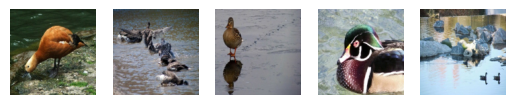

In [24]:
fig, axs = plt.subplots(1, 5)

i = 0
for batch_x, batch_y in train_dataset.as_numpy_iterator():
    for x, y in zip(batch_x, batch_y):
        if i >= 5:
            break
        if y[0] == 1:
            axs[i].imshow(x.astype(int))
            axs[i].set_axis_off()
            i += 1

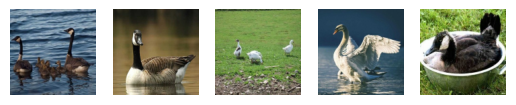

In [25]:
fig, axs = plt.subplots(1, 5)

i = 0
for batch_x, batch_y in train_dataset.as_numpy_iterator():
    for x, y in zip(batch_x, batch_y):
        if i >= 5:
            break
        if y[0] == 0:
            axs[i].imshow(x.astype(int))
            axs[i].set_axis_off()
            i += 1

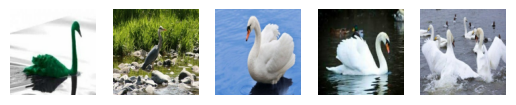

In [26]:
fig, axs = plt.subplots(1, 5)

i = 0
for batch_x, batch_y in train_dataset.as_numpy_iterator():
    for x, y in zip(batch_x, batch_y):
        if i >= 5:
            break
        if y[2] == 1:
            axs[i].imshow(x.astype(int))
            axs[i].set_axis_off()
            i += 1

In [27]:
"""
1,0,0   - Class label 1
0,1,0   - Class label 2
0,0,1   - Class label 3
"""

'\n1,0,0   - Class label 1\n0,1,0   - Class label 2\n0,0,1   - Class label 3\n'

In [28]:
def build_model() -> models.Sequential:

    model = models.Sequential()
    model.add(layers.Normalization(input_shape = (256, 256, 3)))
    model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.1))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.1))
    model.add(layers.MaxPooling2D((2,2)))
#     model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
#     model.add(layers.BatchNormalization())
#     model.add(layers.Dropout(0.1))
#     model.add(layers.MaxPooling2D((2,2)))
#     model.add(layers.Conv2D(256, (3, 3), activation = 'relu'))
#     model.add(layers.BatchNormalization())
#     model.add(layers.Dropout(0.1))
#     model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation = 'relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(256, activation = 'relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(256, activation = 'relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(3, activation = 'softmax'))

    model.compile(
        optimizer = 'adam',
        loss = 'categorical_crossentropy',
        metrics = ['accuracy']
    )

    return model

In [29]:
model = build_model()

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normaliza  (None, 128, 128, 3)       7         
 tion)                                                           
                                                                 
 conv2d_4 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 batch_normalization_4 (Bat  (None, 126, 126, 32)      128       
 chNormalization)                                                
                                                                 
 dropout_7 (Dropout)         (None, 126, 126, 32)      0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                      

In [31]:
checkpoint_file = 'modelcheckpoint.keras'

In [32]:
callbacks_ = [
    callbacks.ModelCheckpoint(
        checkpoint_file,
        monitor = 'val_accuracy',
        save_best_only = True,
        save_weights_only = True,
        verbose = 1
    ),
    callbacks.EarlyStopping(
        monitor = 'val_accuracy',
        min_delta = 0.01,
        patience = 10,
        verbose = 1
    )
]

In [33]:
history = model.fit(
    train_dataset,
    batch_size = 32,
    epochs = 20,
    validation_data = valid_dataset,
    shuffle = True,
    callbacks = callbacks_
)

Epoch 1/20
46/46 [==============================] - ETA: 0s - loss: 10.0199 - accuracy: 0.4277
Epoch 1: val_accuracy improved from -inf to 0.27901, saving model to modelcheckpoint.keras
46/46 [==============================] - 11s 219ms/step - loss: 10.0199 - accuracy: 0.4277 - val_loss: 1.6524 - val_accuracy: 0.2790
Epoch 2/20
46/46 [==============================] - ETA: 0s - loss: 4.4784 - accuracy: 0.4504
Epoch 2: val_accuracy improved from 0.27901 to 0.55525, saving model to modelcheckpoint.keras
46/46 [==============================] - 10s 207ms/step - loss: 4.4784 - accuracy: 0.4504 - val_loss: 1.1076 - val_accuracy: 0.5552
Epoch 3/20
46/46 [==============================] - ETA: 0s - loss: 3.0574 - accuracy: 0.4463
Epoch 3: val_accuracy did not improve from 0.55525
46/46 [==============================] - 10s 209ms/step - loss: 3.0574 - accuracy: 0.4463 - val_loss: 1.0234 - val_accuracy: 0.5552
Epoch 4/20
46/46 [==============================] - ETA: 0s - loss: 1.6883 - accurac

In [34]:
print(f'Fitting Parameters: {history.params}')

print(f'Available Keys in `history.history`: {history.history.keys()}')

Fitting Parameters: {'verbose': 1, 'epochs': 20, 'steps': 46}
Available Keys in `history.history`: dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Text(0, 0.5, 'Accuracy')

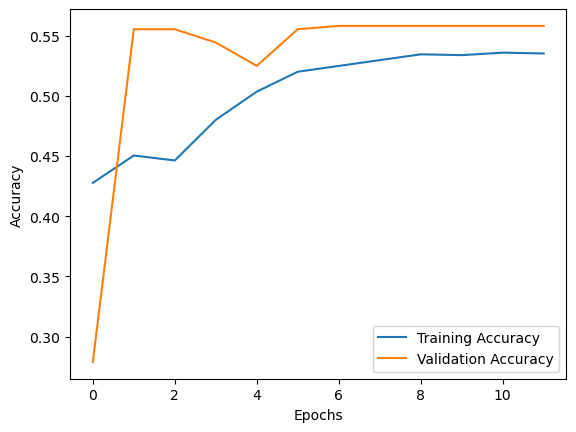

In [35]:
fig, ax = plt.subplots()

ax.plot(
    history.history['accuracy'], label = 'Training Accuracy'
)
ax.plot(
    history.history['val_accuracy'], label = 'Validation Accuracy'
)

ax.legend()

ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')

In [36]:
model.load_weights(checkpoint_file)

In [37]:
valid_loss, valid_accuracy = model.evaluate(valid_dataset)

print(f'Validation Loss: {valid_loss:.4f}') 
print(f'Validation Accuracy: {(valid_accuracy * 100.0):.1f}%')

12/12 [==============================] - 0s 33ms/step - loss: 1.0913 - accuracy: 0.5580
Validation Loss: 1.0913
Validation Accuracy: 55.8%


In [38]:
"""
1.
Validation Loss: 0.9551
Validation Accuracy: 56.5%
2.
Validation Loss: 0.9551
Validation Accuracy: 60.5%
3.
Validation Loss: 0.9095
Validation Accuracy: 61.6%
4.
Validation Loss: 0.9221
Validation Accuracy: 56.6%
5.
Validation Loss: 1.0228
Validation Accuracy: 57.2%
6.
Validation Loss: 0.9802
Validation Accuracy: 56.4%

"""

'\n1.\nValidation Loss: 0.9551\nValidation Accuracy: 56.5%\n2.\nValidation Loss: 0.9551\nValidation Accuracy: 60.5%\n3.\nValidation Loss: 0.9095\nValidation Accuracy: 61.6%\n4.\nValidation Loss: 0.9221\nValidation Accuracy: 56.6%\n5.\nValidation Loss: 1.0228\nValidation Accuracy: 57.2%\n6.\nValidation Loss: 0.9802\nValidation Accuracy: 56.4%\n\n'